<h1> Torch Practice </h1>
Where I play around with torch tutorials as well as test some implementation ideas
<br> Note to self: Remember to read the API! <a href="https://pytorch.org/docs/stable/index.html"> Link </a>

<h1> April 20 2020: PyTorch Beginner Tutorial </h1>
Just following the beginner tutorial  from <a href="https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html"> here </a>

<h1> Tensors </h1>

In [3]:
from __future__ import print_function
import torch

In [4]:
# construct a 5x3 matrix, uninitialized:
x = torch.empty(5, 3)
print(x) # whatever values are inside this "empty" matrix is just whatever values were in the allocated memory at the time 

tensor([[7.6040e+16, 9.0664e-43, 7.6040e+16],
        [9.0664e-43, 7.6040e+16, 9.0664e-43],
        [7.6040e+16, 9.0664e-43, 7.6040e+16],
        [9.0664e-43, 7.6040e+16, 9.0664e-43],
        [7.6040e+16, 9.0664e-43, 7.6040e+16]])


In [5]:
# construct a randomly initialized matrix:
x = torch.rand(5, 3)
print(x)

tensor([[0.1465, 0.7502, 0.8895],
        [0.5840, 0.1279, 0.9449],
        [0.6140, 0.4411, 0.1912],
        [0.9267, 0.1619, 0.3431],
        [0.7339, 0.7059, 0.2059]])


In [6]:
# construct a matrix filled with zeros and of dtype long:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [7]:
# construct a tensor directly from data:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [8]:
# create a tensor based on an existing tensor. these methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user
x = x.new_ones(5, 3, dtype=torch.double) # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=float) # override dtype!
print(x) # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.1752,  0.6100, -1.5148],
        [ 0.1438,  2.2077,  1.2403],
        [-0.7760,  1.8198,  0.4396],
        [-1.0487,  0.0838, -1.0404],
        [-0.4941,  0.1068, -1.2928]], dtype=torch.float64)


In [10]:
# get its size 
print(x.size()) # torch,Size is a tuple, so it supports all tuple operations

torch.Size([5, 3])


<h1> Operations </h1>

In [11]:
# Addition with multiple syntaxes
# First syntax
y = torch.rand(5, 3)

print(x + y)

tensor([[ 1.9651,  1.1894, -0.9744],
        [ 0.4168,  3.1826,  1.5720],
        [ 0.2210,  2.1405,  0.7205],
        [-0.9441,  0.6162, -0.7964],
        [-0.0211,  0.2507, -0.5799]], dtype=torch.float64)


In [12]:
# Second syntax
print(torch.add(x, y))

tensor([[ 1.9651,  1.1894, -0.9744],
        [ 0.4168,  3.1826,  1.5720],
        [ 0.2210,  2.1405,  0.7205],
        [-0.9441,  0.6162, -0.7964],
        [-0.0211,  0.2507, -0.5799]], dtype=torch.float64)


In [15]:
# Providing an output tensor as an argument 
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.9651,  1.1894, -0.9744],
        [ 0.4168,  3.1826,  1.5720],
        [ 0.2210,  2.1405,  0.7205],
        [-0.9441,  0.6162, -0.7964],
        [-0.0211,  0.2507, -0.5799]])


In [16]:
# In-place addition
y.add_(x)
print(y)

#any operation that mutates a tensor in-place is post-fixed with an _.

tensor([[ 1.9651,  1.1894, -0.9744],
        [ 0.4168,  3.1826,  1.5720],
        [ 0.2210,  2.1405,  0.7205],
        [-0.9441,  0.6162, -0.7964],
        [-0.0211,  0.2507, -0.5799]])


In [18]:
# you can use standard NumPy-like indexing
print(x)
print(x[:, 1])

tensor([[ 1.1752,  0.6100, -1.5148],
        [ 0.1438,  2.2077,  1.2403],
        [-0.7760,  1.8198,  0.4396],
        [-1.0487,  0.0838, -1.0404],
        [-0.4941,  0.1068, -1.2928]], dtype=torch.float64)
tensor([0.6100, 2.2077, 1.8198, 0.0838, 0.1068], dtype=torch.float64)


In [20]:
# Resizing: If you want to resize/reshape tensor, you can use torch.view
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1 inferred from other dimensions
print(x)
print(y)
print(z)
print(x.size(), y.size(), z.size())

tensor([[ 0.1647, -0.2865, -2.3422, -0.4476],
        [ 0.5537, -1.4467, -0.3825,  0.9929],
        [-0.6269,  0.6901,  0.7499, -0.3030],
        [-0.9951, -0.5215, -0.1950, -1.0005]])
tensor([ 0.1647, -0.2865, -2.3422, -0.4476,  0.5537, -1.4467, -0.3825,  0.9929,
        -0.6269,  0.6901,  0.7499, -0.3030, -0.9951, -0.5215, -0.1950, -1.0005])
tensor([[ 0.1647, -0.2865, -2.3422, -0.4476,  0.5537, -1.4467, -0.3825,  0.9929],
        [-0.6269,  0.6901,  0.7499, -0.3030, -0.9951, -0.5215, -0.1950, -1.0005]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [26]:
# if you have a one element tensor, use .item() to get the value as a Python number 
x = torch.randn(1)
print(x)
print(x.item())

tensor([-2.6952])
-2.695227861404419


<b> Read later: </b> <a href="https://pytorch.org/docs/stable/torch.html"> PyTorch Torch Tensor Operations API </a>

<h1> NumPy Bridge </h1>
Converting a Torch Tensory to a NumPy array and vice versa <br>
Note: The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other

In [31]:
# Converting a Torch Tensor to a NumPy Array
a = torch.ones(5)
print(a)
b = a.numpy() # turns the tensor a into a numpy array
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [32]:
# notice how adding something to one of them will affect the other
a.add_(1) # in place addition
print(a)
print(b)
# print(b.add_(1)) <-- Error! b is a numpy array object, NOT a Tensor object!

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [35]:
# See how changing the np array changed the Tensor Tensor automatically
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # turn the numpy array into a tensor 
np.add(a, 1, out=a) # numpy operation on the numpy array 
print(a)
print(b) # both b's and a's values will be the same

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


<h1> CUDA Tensors </h1>
All the Tensors on the CPU except a CharTensor support converting to NumPy and back

In [36]:
# Tensors can be moved onto any device using the .to method:
if torch.cuda.is_available(): # check if CUDA is available
    device = torch.device("cuda") # torch.device(device) can either be "cpu" or "cuda"
    y = torch.ones_like(x, device=device) # directly create a tensor on GPU
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([-1.6952], device='cuda:0')
tensor([-1.6952], dtype=torch.float64)


<h1> AutoGrad: Automatic Differentiation </h1>
The autograd package provides automatic differentiation for all operations on Tensors.

In [37]:
# create a tensor and set requires_grad=True to track computation with it
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [38]:
# do a tensor operation
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [41]:
# y was created as a result of an operation, so it has a grad_fn:
print(y.grad_fn)

In [42]:
# do more operations on y 
z = y * y * 3 
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [44]:
# .requires_grad_(...) changes an existing Tensor's require_grad flag in_place 
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


<h1> Gradients </h1>
Backprop!

In [47]:
# because out contains a single scalar, out.backward() is equivalent to out.backward(torch.tensor(1.))
out.backward()

In [50]:
# print gradients d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [51]:
# let's take a look at an example of vector-Jacobian product: 
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([  312.1145,  -350.2947, -1261.6964], grad_fn=<MulBackward0>)


In [52]:
# now in this case y is no longer as scalar. torch.autograd could not compute the full jacobian directly, but if we just want the 
# vector-Jacobian product, simply pass the vector to backward as argument 
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [53]:
# stop autograd from trackign history 
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [54]:
# or by using .detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


<b> Read later: </b> <a href="https://pytorch.org/docs/stable/autograd.html#function"> PyTorch Autograd API </a>

<h1> Neural Networks </h1>
Practice with using the torch.nn package with a basic feedforward network

In [58]:
# define the network
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self): # Constructor
        super(Net, self).__init__() # super class constructor 
        
        # 2 convolutional layers
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        # affine operation: y = wx + b ( i think these are the actual hidden layers?)
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6 * 6 image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # if the size is a square you can only specify a single number 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return(x)
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [59]:
# the learnable parameters of a model are returned by net.parameters()
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's.weights

10
torch.Size([6, 1, 3, 3])


In [60]:
# create a random 32 input and pass it into our net for evaluation 
input = torch.randn(1, 1, 32, 32)
print(input)
out = net(input)
print(out)

tensor([[[[ 0.0499,  0.1086, -0.1667,  ...,  0.4023, -0.5976, -1.1946],
          [ 0.0148, -0.9079,  2.4513,  ..., -0.4476,  0.4506, -1.5137],
          [ 0.2165, -0.1253,  0.0335,  ..., -0.3445,  1.4564, -1.1005],
          ...,
          [ 2.2433,  1.1902,  0.6741,  ...,  1.5873, -0.1161,  0.9130],
          [-0.5422, -2.4781, -1.1004,  ...,  1.4735, -0.2849, -0.2638],
          [-0.2167,  0.2619, -1.4728,  ...,  0.5453,  1.4421,  0.0563]]]])
tensor([[-0.1005, -0.0357, -0.0490, -0.0313, -0.0556,  0.0207, -0.0768,  0.0381,
         -0.0492,  0.0824]], grad_fn=<AddmmBackward>)


In [61]:
# zero the gradient buffers of all parameters and backprops with random gradients
net.zero_grad()
out.backward(torch.randn(1, 10))
# Note: torch.nn only supports mini-batches.

<h1> Loss Function </h1>

In [63]:
output = net(input)
target = torch.randn(10) # a dummy target
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9455, grad_fn=<MseLossBackward>)


In [66]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear 
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

In [67]:
# to backpropagate the error all we have to do is to loss.backward()
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0015,  0.0167, -0.0229,  0.0053,  0.0159, -0.0050])


<b> Read later: </b> <a href="https://pytorch.org/docs/stable/nn.html"> PyTorch NN API </a>

<h1> Update the Weights </h1>
<code> weight = weight - learning_rate * gradient </code>

In [69]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [71]:
# use various update methods, such as this example
import torch.optim as optim

# create your optimizer 
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

<h1> Training a Classifier </h1>
<ol>
    <li> Load and normalize the CIFAR10 training and test datasets using <code> torchvision </code> </li>
    <li> Define a CNN </li>
    <li> Define a loss function </li>
    <li> Train the network on the training data </li>
    <li> Test the network on the test data </li>
</ol>

<h1> Loading and Normalizing CIFAR10 </h1>

In [73]:
import torch
import torchvision
import torchvision.transforms as transforms

In [74]:
# Transforming the dataset images from PILImages of range [0, 1] to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


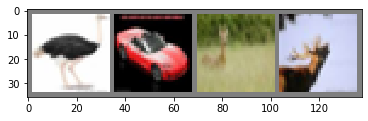

 bird   car  deer  deer


In [75]:
# Show some of the training images for fun
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images 
imshow(torchvision.utils.make_grid(images))
# print labels 
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

<h1> Define a CNN </h1>